In [44]:
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [39]:
Image(url='https://aria42.com/images/bfgs.png', width=400)

## basics

- references
    - https://aria42.com/blog/2014/12/understanding-lbfgs
    - https://colab.research.google.com/github/davidbau/how-to-read-pytorch/blob/master/notebooks/3-Pytorch-Optimizers.ipynb

- L-BFGS（Limited-memory Broyden–Fletcher–Goldfarb–Shanno）：属于拟牛顿方法的一种，使用一阶导数信息构建目标函数的二阶近似，即使用梯度信息来近似Hessian矩阵（二阶导数矩阵）。这使得L-BFGS在非凸问题上比SGD表现更好，特别是在优化平滑或近似二次的目标函数时。
- SGD：每次更新仅使用一个或少数几个样本计算的一阶导数（即梯度），而不构建目标函数的二阶近似。这意味着SGD可能需要更多的迭代次数来收敛，特别是在目标函数的形状复杂或非凸时。

## case：Rosenbrock function

In [35]:
# 2d Rosenbrock function
def f(x):
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

$$
f(x,y)=(1-x)^2+100(y-x^2)^2
$$

In [32]:
# Gradient descent
x_gd = 10 * torch.ones(2, 1)
# x_gd = torch.zeros(2, 1)
x_gd.requires_grad = True
gd = optim.SGD([x_gd], lr=1e-5)
history_gd = []
for i in range(100):
    gd.zero_grad()
    objective = f(x_gd)
    objective.backward()
    gd.step()
    history_gd.append(objective.item())

In [27]:
x_gd

tensor([[1.9980e-03],
        [2.4998e-07]], requires_grad=True)

In [31]:
# L-BFGS
def closure():
    lbfgs.zero_grad()
    objective = f(x_lbfgs)
    objective.backward()
    return objective


x_lbfgs = 10 * torch.ones(2, 1)
# x_lbfgs = torch.zeros(2, 1)
x_lbfgs.requires_grad = True

lbfgs = optim.LBFGS([x_lbfgs],
                    history_size=10,
                    max_iter=4,
                    line_search_fn="strong_wolfe")

history_lbfgs = []
for i in range(100):
    history_lbfgs.append(f(x_lbfgs).item())
    lbfgs.step(closure)

In [29]:
x_lbfgs

tensor([[1.0000],
        [1.0000]], requires_grad=True)

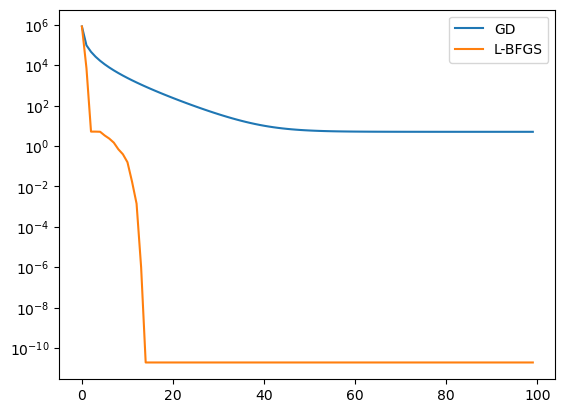

In [33]:
# Plotting
plt.semilogy(history_gd, label='GD')
plt.semilogy(history_lbfgs, label='L-BFGS')
plt.legend()
plt.show()

### cases: linear regression

Epoch [1/10], Loss: 0.5054
Epoch [2/10], Loss: 0.3055
Epoch [3/10], Loss: 0.3011
Epoch [4/10], Loss: 0.3004
Epoch [5/10], Loss: 0.2997
Epoch [6/10], Loss: 0.2990
Epoch [7/10], Loss: 0.2983
Epoch [8/10], Loss: 0.2977
Epoch [9/10], Loss: 0.2970
Epoch [10/10], Loss: 0.2964


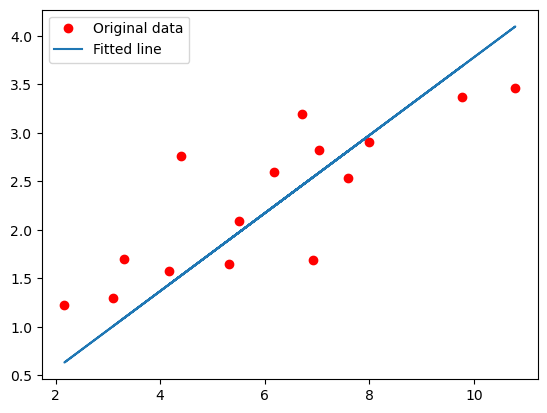

In [61]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 10

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()

Epoch [1/10], Loss: 0.1689
Epoch [2/10], Loss: 0.1689
Epoch [3/10], Loss: 0.1689
Epoch [4/10], Loss: 0.1689
Epoch [5/10], Loss: 0.1689
Epoch [6/10], Loss: 0.1689
Epoch [7/10], Loss: 0.1689
Epoch [8/10], Loss: 0.1689
Epoch [9/10], Loss: 0.1689
Epoch [10/10], Loss: 0.1689


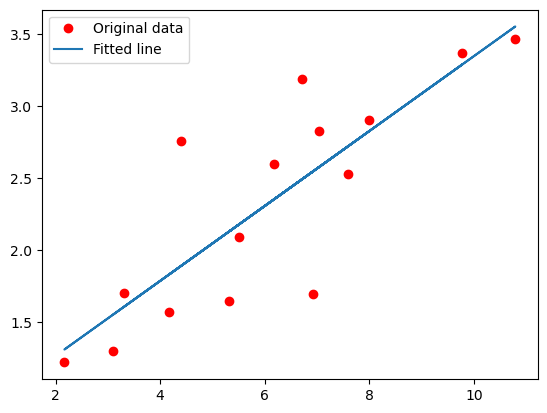

In [59]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 10
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()

lbfgs = optim.LBFGS(model.parameters())

inputs = torch.from_numpy(x_train)
targets = torch.from_numpy(y_train)

def closure():
    lbfgs.zero_grad()
    outputs = model(inputs)
    # print(inputs, outputs, targets)
    loss = criterion(outputs, targets)
    loss.backward()
    return loss

for epoch in range(num_epochs):
    lbfgs.step(closure)

    pred = model(inputs)
    loss = criterion(pred, targets)
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()